<a href="https://colab.research.google.com/github/thaliagurgel/desafio_f1/blob/main/DesafioAccenture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset de visualização e exploração de dados da fórmula 1**

Este notebook se refere à análise de um dataset obtido através de dados disponíveis no site https://www.kaggle.com/ da base de dados dos campeonatos de Fórmula 1. 

Após análise da problemática proposta, o time de desenvolvedores implementaram os modelos conceitual, lógico e físico de um banco de dados relacional utilizando o SGBD Oracle e, posteriormente, implementaram o modelo dimensional de um data warehous:



O desafio proposta visa responder aos insights abaixo:
Perguntas a serem respondidas:
1.   Classificação do campeonado de pilotos;
2.   Classificação do campeonado de contrutores;
3.   Pilotos com mais pódios;
4.   Pilotos com mais poles (primeiro lugar no treino classificatório).

A seguir, iremos mostrar nosso código de limpeza e exploração dos dados a fim de responder as questões acima.

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import squarify 
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

from google.colab import drive
#drive.mount('/gdrive')



**Carregamento das bases de dados do Data Warehouse**


In [ ]:
###################### DIMENSÃO DATA ##################
df_dim_data = pd.read_csv('dim_data.csv', sep=',', parse_dates= {"Data" : ['ANO','MES','DIA']}, usecols={'ID_DATA', 'ANO', 'MES', 'DIA'})
df_dim_data.dropna() #remove as linhas em que haja algum dado nulo
df_dim_data = df_dim_data.drop_duplicates() #remove as tuplas duplicadas caso haja
#print(df_dim_data.head())
#df_dim_data.info()

###################### DIMENSÃO PILOTO ##################
df_dim_piloto = pd.read_csv('dim_piloto.csv', sep=',', parse_dates=True, encoding='ISO-8859-1')
df_dim_data.dropna()
df_dim_piloto['NU_PILOTO'] = pd.to_numeric(df_dim_piloto['NU_PILOTO'], errors='coerce').fillna(0) #transforma os campos '\N' em 0.0 deixando essa coluna numérica.
#print(df_dim_piloto.head())
#df_dim_piloto.info()

###################### DIMENSÃO GRANDE PRÊMIO ##################
df_dim_grande_premio = pd.read_csv('dim_grande_premio.csv', sep=',', parse_dates=True)
df_dim_grande_premio.dropna()
df_dim_grande_premio = df_dim_grande_premio.drop_duplicates()
df_dim_grande_premio['DT_GRANDE_PREMIO'] = pd.to_datetime(df_dim_grande_premio['DT_GRANDE_PREMIO'])

#print(df_dim_grande_premio.get('DT_GRANDE_PREMIO'))  #retorna os valores de uma coluna específica
#df_dim_grande_premio.head()
#df_dim_grande_premio.info()

###################### DIMENSÃO CONSTRUTOR ##################
df_dim_construtor = pd.read_csv('dim_construtor.csv', sep=',', parse_dates=True)
df_dim_construtor.dropna()
df_dim_construtor = df_dim_construtor.drop_duplicates()
#print(df_dim_construtor.head())
#df_dim_construtor.info()


###################### DIMENSÃO STATUS ##################
df_dim_status = pd.read_csv('dim_status.csv', sep=',', parse_dates=True)
df_dim_status.dropna()
df_dim_status = df_dim_status.drop_duplicates()
#print(df_dim_status.head())
#df_dim_status.info()

###################### FATO RESULTADOS ##################
df_ft_resultados = pd.read_csv('ft_resultados1.csv', sep=',', parse_dates=True)
df_ft_resultados.dropna()
df_ft_resultados = df_ft_resultados.drop_duplicates()
df_ft_resultados['POSICAO_GP'] = pd.to_numeric(df_ft_resultados['POSICAO_GP'], errors='coerce').fillna(0) #transforma de object para numeric
df_ft_resultados['POSICAO_GP'] = df_ft_resultados['POSICAO_GP'].astype(int) #transforma de numeric para int
df_ft_resultados = df_ft_resultados.rename(columns={'SK_PILOTO': 'ID_PILOTO'})
df_ft_resultados = df_ft_resultados.rename(columns={'SK_STATUS': 'ID_STATUS'})
df_ft_resultados = df_ft_resultados.rename(columns={'SK_CONSTRUTOR': 'ID_CONSTRUTOR'})
df_ft_resultados = df_ft_resultados.rename(columns={'SK_GRANDE_PREMIO': 'ID_GRANDE_PREMIO'})
df_ft_resultados = df_ft_resultados.rename(columns={'SK_DATA': 'ID_DATA'})
#print(df_ft_resultados.head())
#df_ft_resultados.info()
#df_ft_resultados.describe()




**Classificação dos construtores por pontos**

In [ ]:
#df_ft_resultados.describe()
#df_dim_construtor.merge(df_ft_resultados)
df_clas_construt_full = pd.merge(df_ft_resultados, df_dim_construtor, how='inner', on='ID_CONSTRUTOR')
df_classif_construt = pd.DataFrame(df_clas_construt_full, columns= [ 'NM_CONSTRUTOR', 'PONTOS_CONSTRUTOR', 'POSICAO_CONSTRUTOR' ])
#df_classif_construt["PONTOS_CONSTRUTOR"].describe()
pontos_construtor=df_classif_construt[["PONTOS_CONSTRUTOR","NM_CONSTRUTOR"]].groupby('NM_CONSTRUTOR').sum()
pontos_construtor.sort_values(by=['PONTOS_CONSTRUTOR'], inplace=True, ascending=False)
print(pontos_construtor)
df_classif_construt["PONTOS_CONSTRUTOR"] = pd.to_numeric(df_classif_construt["PONTOS_CONSTRUTOR"])
df_classif_construt.sort_values(by=['PONTOS_CONSTRUTOR'], inplace=True, ascending=False)
dfp = df_classif_construt.groupby(["NM_CONSTRUTOR"]).agg({"PONTOS_CONSTRUTOR":"sum"}).loc[lambda d: d["PONTOS_CONSTRUTOR"].gt(100)]
dfp =dfp.sort_values('PONTOS_CONSTRUTOR', ascending=True)
px.bar(dfp, x=dfp.index, y="PONTOS_CONSTRUTOR", color="PONTOS_CONSTRUTOR")
#print (df_classif_construt)




                    PONTOS_CONSTRUTOR
NM_CONSTRUTOR                        
ferrari                       80080.5
mercedes                      59640.0
mclaren                       51771.6
red_bull                      50037.0
williams                      31748.5
...                               ...
eurobrun                          0.0
mclaren-alfa_romeo                0.0
fondmetal                         0.0
mbm                               0.0
de_tomaso-ferrari                 0.0

[159 rows x 1 columns]


 **Construtores com maior número de vitórias no GP**

In [ ]:
gry=df_classif_construt
gry['POSICAO_CONSTRUTOR'] = pd.to_numeric(gry['POSICAO_CONSTRUTOR'], errors='coerce')
gry = gry[gry.POSICAO_CONSTRUTOR == 1]

team_win_c= gry.groupby('NM_CONSTRUTOR')['NM_CONSTRUTOR'].count()
team_win_c = pd.DataFrame(team_win_c)
team_win_c.columns = ['PONTOS_CONSTRUTOR']
team_win_c.reset_index(level=0, inplace=True)

team_win_c.sort_values(by=['PONTOS_CONSTRUTOR'], inplace=True, ascending=False)
team_win_c = team_win_c.head(10)
team_win_c = team_win_c[::-1]

fig = px.bar(team_win_c, x='NM_CONSTRUTOR', y='PONTOS_CONSTRUTOR',color='PONTOS_CONSTRUTOR',width=750, height=500)
fig.update_layout(title={'text': 'Classificação dos construtores por vitórias no GP','y':0.95,'x':0.5})
fig.show()

**Pilotos com mais Poles(1° Lugar no treino classifictório)**

In [ ]:
df_poles = df_classif_pilotos_poles[df_classif_pilotos_poles.POSICAO_TREINO == 1]

In [ ]:
df_poles = df_poles[['NM_PILOTO', 'POSICAO_TREINO']]
qt_poles = df_poles.NM_PILOTO.value_counts(ascending = False)
top_10_poles = qt_poles[:10]
top_10_poles

Rubens       188
David        180
Mark         154
Giancarlo    154
Jarno        148
Michael      135
Jenson       127
Kimi         125
Nick         124
Fernando     123
Name: NM_PILOTO, dtype: int64

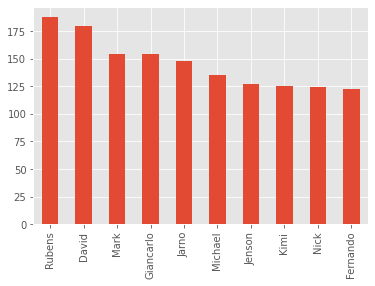

In [ ]:
top_10_poles.plot(kind = 'bar')

**Pilotos com mais pódios**

In [ ]:
df_podios = df_classif_pilotos[df_classif_pilotos.POSICAO_GP.isin({1, 2, 3})]

In [ ]:
qt_podios = df_podios.NM_PILOTO.value_counts(ascending = False)
top_10_podios = qt_podios[:10]
top_10_podios

Michael     1829
Kimi        1218
Fernando    1110
Rubens       796
Damon        614
Felipe       598
David        583
Lewis        568
Mika         490
Jenson       466
Name: NM_PILOTO, dtype: int64

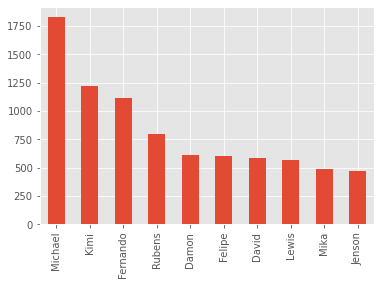

In [ ]:
top_10_podios.plot(kind = 'bar')

**Campeonato dos Pilotos**

In [ ]:
df_campeoes = df_classif_pilot[df_classif_pilot.POSICAO_GP == 1]
df_campeoes

,ANO_TEMPORADA,NM_PILOTO,POSICAO_GP,ID_PILOTO,PTS_PILOTO
0,NaN,Lewis,1,1,10
1,NaN,Lewis,1,1,10
2,NaN,Lewis,1,1,10
3,NaN,Lewis,1,1,10
4,NaN,Lewis,1,1,10
...,...,...,...,...,...
84398,NaN,Nigel,1,95,10
84399,NaN,Nigel,1,95,10
84400,NaN,Nigel,1,95,10
84401,NaN,Nigel,1,95,10


In [ ]:
qt_campeoes = df_campeoes.NM_PILOTO.value_counts(ascending = False)
top_10_campeoes = qt_campeoes[:10]
top_10_campeoes

Michael     1198
Fernando     442
Kimi         372
Damon        362
Felipe       232
Lewis        230
Jenson       142
Mika         130
Rubens       120
Juan         120
Name: NM_PILOTO, dtype: int64

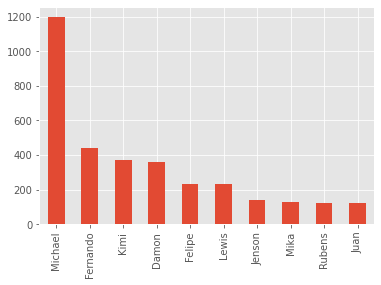

In [ ]:
top_10_campeoes.plot(kind = 'bar')